# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# Data collection

<b><i> Data import </i></b>

In [2]:
tit_data = pd.read_csv("Titanic dataset/train.csv")

In [3]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b><i> Columns description </i></b>

In [4]:
tit_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |	
| Age |	Age in years |	
| sibsp | # of siblings / spouses aboard the Titanic |
| parch | # of parents / children aboard the Titanic |	
| ticket | Ticket number |	
| fare | Passenger fare	|
| cabin | Cabin number |	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

# Data cleaning

<b><i> Describe the data </i></b>

In [5]:
tit_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I notice that there is an outlier in the "Fare" feature. I wanna look into it.

In [6]:
tit_data[tit_data['Fare']==max(tit_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


I assume these 3 people are from the higher class of the ship.

<b><i> Check for null values </i></b>

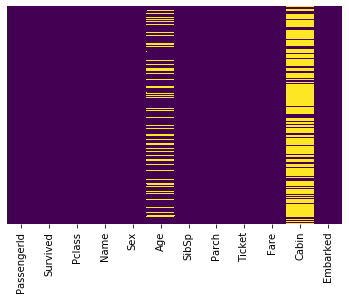

In [7]:
sns.heatmap(tit_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
print("{0:.0%}".format(tit_data['Age'].isnull().value_counts()[1]/tit_data.shape[0]),"of missing values in the 'Age' feature.")
print("{0:.0%}".format(tit_data['Cabin'].isnull().value_counts()[1]/tit_data.shape[0]),"of missing values in the 'Cabin' feature.")

20% of missing values in the 'Age' feature.
77% of missing values in the 'Cabin' feature.


We can see that the "Cabin" feature has a lot of missing values, we might consider dropping it.
Regarding the "Age" feature, we might look into other solutions...

In [9]:
tit_data_clean = tit_data.drop('Cabin',axis=1)

In [10]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
tit_data_clean['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

I notice that "mean" and "median" are quite close. I assume both could be working solutions for filling missing values. I will choose "mean" to fill NAs.

In [12]:
tit_data_clean['Age'].fillna(tit_data['Age'].mean(),inplace=True)

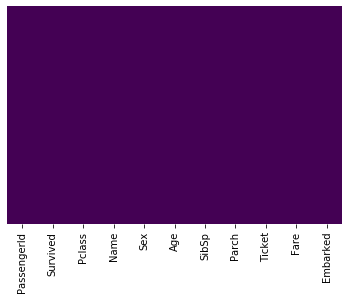

In [13]:
sns.heatmap(tit_data_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

That's it! We took care of null values.

# Exploratory Data Analysis (EDA)

We might perform other steps of data cleaning during the EDA.

In [14]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


/Users/salim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/salim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


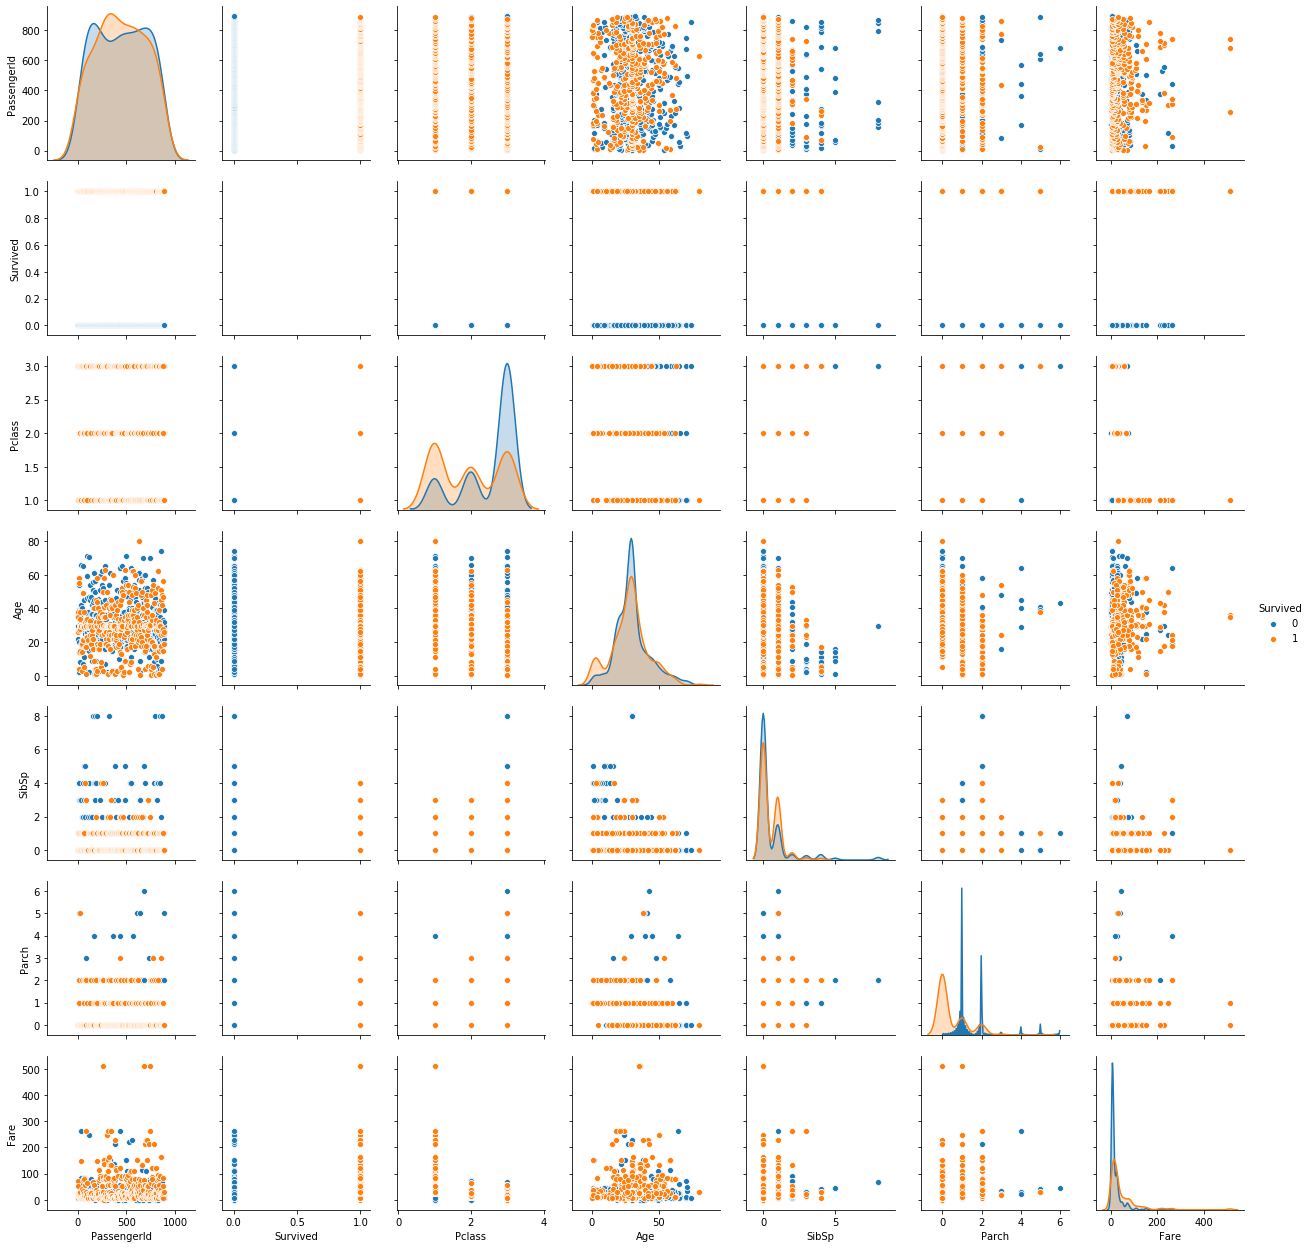

In [15]:
sns.pairplot(tit_data_clean,hue="Survived")

I will have a look in more details at some numerical features.

<b> NUMERICAL FEATURES </b>

<b><i> Age </i></b>

In [16]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


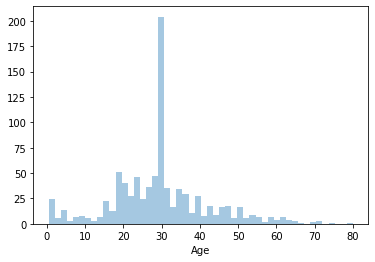

In [17]:
sns.distplot(tit_data_clean['Age'],kde=False,bins=50)

Having a look at this chart, I would like to know if the age had any impact on being a survivor or not. Therefore, I will transform these numerical values into categorical values in order to determine if any category was spared more than another.

In [18]:
tit_data_clean['Age_cat']=0
for i in range(0,tit_data_clean.shape[0]):
    if tit_data_clean['Age'][i]<=10:
        tit_data_clean['Age_cat'][i]='0-10'
    elif tit_data_clean['Age'][i]>10 and tit_data_clean['Age'][i]<=20:
        tit_data_clean['Age_cat'][i]='11-20'
    elif tit_data_clean['Age'][i]>20 and tit_data_clean['Age'][i]<=30:
        tit_data_clean['Age_cat'][i]='21-30'
    elif tit_data_clean['Age'][i]>30 and tit_data_clean['Age'][i]<=40:
        tit_data_clean['Age_cat'][i]='31-40'
    elif tit_data_clean['Age'][i]>40 and tit_data_clean['Age'][i]<=50:
        tit_data_clean['Age_cat'][i]='41-50'       
    elif tit_data_clean['Age'][i]>50 and tit_data_clean['Age'][i]<=60:
        tit_data_clean['Age_cat'][i]='51-60'
    elif tit_data_clean['Age'][i]>60 and tit_data_clean['Age'][i]<=70:
        tit_data_clean['Age_cat'][i]='61-70'
    elif tit_data_clean['Age'][i]>70 and tit_data_clean['Age'][i]<=80:
        tit_data_clean['Age_cat'][i]='71-80'

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CW

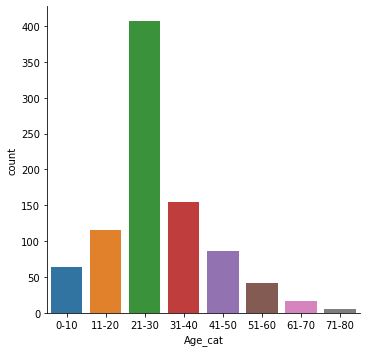

In [19]:
sns.catplot(x='Age_cat',data=tit_data_clean,kind='count',order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

Most passengers were aged between 21 and 30 y.o.

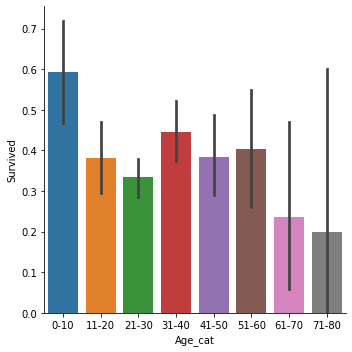

In [20]:
sns.catplot(x='Age_cat',y='Survived',data=tit_data_clean,kind='bar',order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

On average, it looks like babies and kids had more chance to survive.

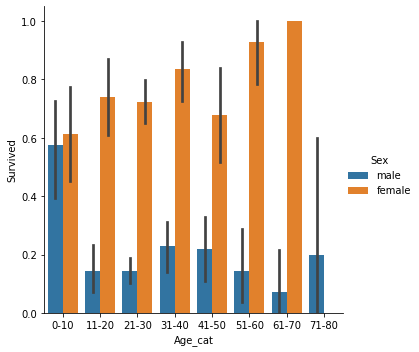

In [21]:
sns.catplot(x='Age_cat',y='Survived',data=tit_data_clean,kind='bar',hue='Sex',order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

On this chart we see that on average females between 61 and 70 y.o were more likely to survive than the other categories. For males, it is clear that young kids between 0 and 10 y.o were more likely to survive.

<b><i> SibSp + Parch </i></b>

In [22]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40


As 'SibSp' and 'Parch' are related, I will try to create a new feature called 'Family size'. I will then visualize this new feature and determine if larger/smaller families had more chance to survive.

In [23]:
tit_data_clean['Family Size'] = tit_data_clean['SibSp'] + tit_data_clean['Parch']

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


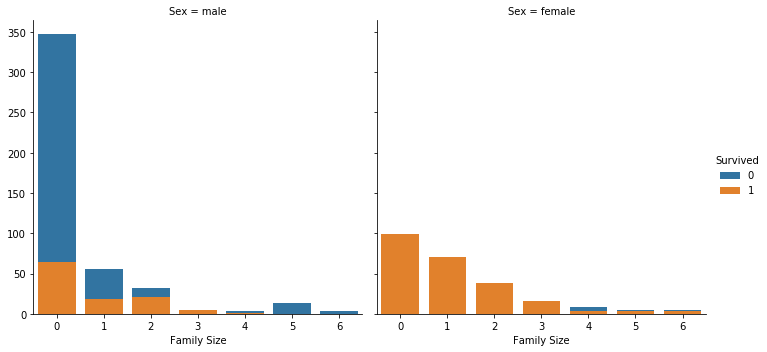

In [24]:
sns.FacetGrid(tit_data_clean,col='Sex',hue='Survived',height=5).map(sns.countplot,'Family Size').add_legend()

These two graphs are very insightful:
- On the one hand, all females survived if they were either alone, or having a family between 1 and 3 people.
- On the other hand, males were less likely to survive if they were alone or having a family of 1 person (spouse?). Between 2 and 4 persons in the family, they had more chance to survive.

<b><i> Fare </i></b>

In [25]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40,0


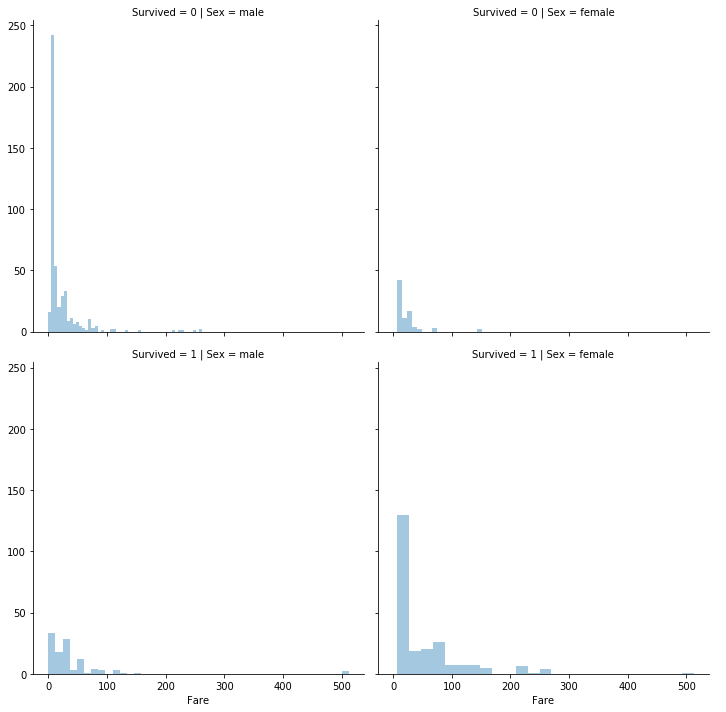

In [26]:
sns.FacetGrid(tit_data_clean,row='Survived',col='Sex',height=5).map(sns.distplot,'Fare',kde=False).add_legend()

We notice here that the "Fare" data looks more spread if passengers survived.

In [27]:
print('Mean fare of men who survived:',tit_data_clean[(tit_data_clean['Survived']==1) & (tit_data_clean['Sex']=='male')]['Fare'].mean())
print('Mean fare of women who survived:',tit_data_clean[(tit_data_clean['Survived']==1) & (tit_data_clean['Sex']=='female')]['Fare'].mean())
print('Mean fare of men who did not survive:',tit_data_clean[(tit_data_clean['Survived']==0) & (tit_data_clean['Sex']=='male')]['Fare'].mean())
print('Mean fare of women who did not survive:',tit_data_clean[(tit_data_clean['Survived']==0) & (tit_data_clean['Sex']=='female')]['Fare'].mean())

Mean fare of men who survived: 40.82148440366974
Mean fare of women who survived: 51.93857339055791
Mean fare of men who did not survive: 21.960992948717944
Mean fare of women who did not survive: 23.02438518518519


Looking at the mean for each category, it is quite clear that men and women who survived had on average a higher fare than those who did not survive.

I will now look into categorical features.

<b> CATEGORICAL FEATURES </b>

<b><i> Sex </i></b>

In [28]:
print("{0:.0%}".format(tit_data_clean['Sex'].value_counts()[0]/tit_data.shape[0]),"of passengers are male.")
print("{0:.0%}".format(tit_data_clean['Sex'].value_counts()[1]/tit_data.shape[0]),"of passengers are female.")

65% of passengers are male.
35% of passengers are female.


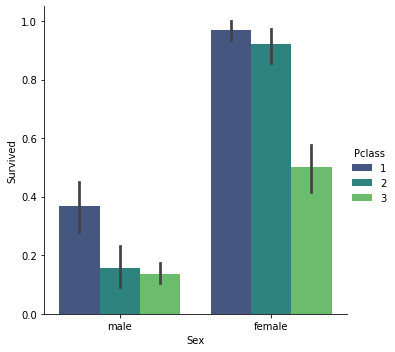

In [29]:
sns.catplot(x='Sex',y='Survived',data=tit_data_clean,kind='bar',hue="Pclass",palette='viridis')

There are two main insights here:
- Males are on average less likely to survive than females
- Third classes are less likely to survive than the others (huge gap between second and third class in female category)
<p>&nbsp;</p>
<i> Even women from third class were more likely to survive than men from first class. </i>

We can imagine that "Sex" and "Pclass" will be important features for our model.

<b><i> Embarked </i></b>

In [30]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40,0


In [31]:
print("{0:.0%}".format(tit_data_clean['Embarked'].value_counts()[0]/tit_data.shape[0]),"of passengers embarked from Southampton (S).") 
print("{0:.0%}".format(tit_data_clean['Embarked'].value_counts()[1]/tit_data.shape[0]),"of passengers embarked from Cherbourg (C).") 
print("{0:.0%}".format(tit_data_clean['Embarked'].value_counts()[2]/tit_data.shape[0]),"of passengers embarked from Queenstown (Q).") 

72% of passengers embarked from Southampton (S).
19% of passengers embarked from Cherbourg (C).
9% of passengers embarked from Queenstown (Q).


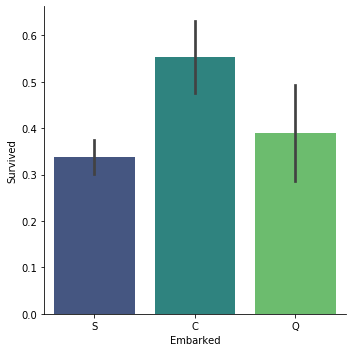

In [32]:
sns.catplot(x='Embarked',y='Survived',data=tit_data_clean,kind='bar',palette='viridis')

Here is another insightful graph. It looks like passengers who embarked from Cherbourg were most likely to survive (on average).

<b> CORRELATIONS </b>

In [33]:
tit_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_cat,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40,0


In [34]:
tit_data_clean.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.217138
Family Size,-0.040143,0.016639,0.065997,-0.248512,0.890712,0.783111,0.217138,1.000000


Let's create a heatmap to visualize the data better.

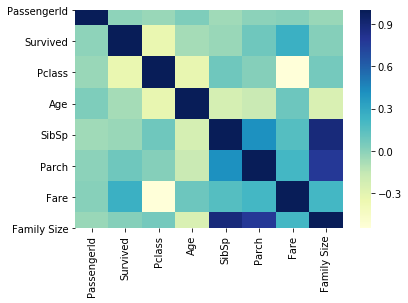

In [49]:
sns.heatmap(tit_data_clean.corr(),cmap='YlGnBu')

Here we can clearly see that: 
- 'Pclass' is negatively correlated to 'Survived' (-0.34)
- 'Fare' is positively correlated to 'Survived' (0.26)

These two features should be decisive in model building.